In [1]:
#from nltk.tokenize import word_tokenize
import nltk
import numpy as np
import gensim
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
import os
import gudhi as gd
import gensim.downloader as api
from gensim.models import KeyedVectors
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score

In [2]:
#wv = api.load('word2vec-google-news-300')

In [3]:
#wv.save("word2vec.kv")

In [4]:
wv = KeyedVectors.load('word2vec.kv')

In [5]:
df = pd.read_csv('train.csv') #load dataset
#df_test = pd.read_csv('test.csv') #load dataset
#df = pd.concat([df_train, df_test])


In [6]:
df.head

<bound method NDFrame.head of             id                                               text author
0      id26305  This process, however, afforded me no means of...    EAP
1      id17569  It never once occurred to me that the fumbling...    HPL
2      id11008  In his left hand was a gold snuff box, from wh...    EAP
3      id27763  How lovely is spring As we looked from Windsor...    MWS
4      id12958  Finding nothing else, not even gold, the Super...    HPL
...        ...                                                ...    ...
19574  id17718  I could have fancied, while I looked at it, th...    EAP
19575  id08973  The lids clenched themselves together as if in...    EAP
19576  id05267  Mais il faut agir that is to say, a Frenchman ...    EAP
19577  id17513  For an item of news like this, it strikes us i...    EAP
19578  id00393  He laid a gnarled claw on my shoulder, and it ...    HPL

[19579 rows x 3 columns]>

In [35]:
# NORMAL BASIC FEATURES

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


#vectorizing X and y to process
vectorize = CountVectorizer(max_df=0.95, min_df=0.005)
X = vectorize.fit_transform(df['text'])
vect = CountVectorizer(tokenizer = lambda x: x.split(), binary = 'true')
y = df['author']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

classifier = LogisticRegression() #OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))


accuracy : 0.7289014256308607
macro f1 score : 0.6878031507514971
micro f1 scoore : 0.6923553079541938
hamming loss : 0.30764469204580625
Precision recall report :
               precision    recall  f1-score   support

         EAP       0.67      0.77      0.72      2587
         HPL       0.69      0.63      0.66      1852
         MWS       0.73      0.65      0.69      2023

    accuracy                           0.69      6462
   macro avg       0.70      0.68      0.69      6462
weighted avg       0.69      0.69      0.69      6462



/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
import re

#function to remove ounctuation
def removePunctuation(x):
    x = x.lower()
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    x = x.replace('\r','')
    x = x.replace('\n','')
    x = x.replace('  ','')
    x = x.replace('\'','')
    return re.sub("["+string.punctuation+"]", " ", x)


#getting stop words
from nltk.corpus import stopwords

stops = set(stopwords.words("english")) 


#function to remove stopwords
def removeStopwords(x):
    filtered_words = [word for word in x.split() if word not in stops]
    return " ".join(filtered_words)


def processText(x):
    x= removePunctuation(x)
    x= removeStopwords(x)
    return x

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
# MIN MEAN MAX POOL OF WORD VECTORS
import copy
import string
#vectorizing X and y to process

X = []
for i in range(len(df['text'])):
    text = processText(df['text'][i])
    s = np.zeros(300)
    minim = s
    maxim = s
    for k in range(len(text)-1):
        if text[k+1] in wv:
            t = wv[text[k+1]]
            s += t
            if np.linalg.norm(t) > np.linalg.norm(maxim):
                maxim = t
            if np.linalg.norm(t) < np.linalg.norm(minim):
                minim = t
        
    X.append(s)

y = df['author']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

classifier = LogisticRegression() #OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy : 0.49432034764046656
macro f1 score : 0.46912272406425015
micro f1 scoore : 0.4862271742494584
hamming loss : 0.5137728257505416
Precision recall report :
               precision    recall  f1-score   support

         EAP       0.50      0.64      0.56      2587
         HPL       0.49      0.41      0.45      1852
         MWS       0.45      0.35      0.40      2023

    accuracy                           0.49      6462
   macro avg       0.48      0.47      0.47      6462
weighted avg       0.48      0.49      0.48      6462



In [9]:
# MIN MEAN MAX POOL OF WORD VECTORS
import copy
#vectorizing X and y to process

df = pd.read_csv('train.csv')

X = []
for i in range(len(df['text'])):
    s = np.zeros(300)
    minim = s
    maxim = s
    for k in range(len(df['text'][i])-1):
        if df['text'][i][k+1] in wv:
            t = wv[df['text'][i][k+1]]
            s += t
            if np.linalg.norm(t) > np.linalg.norm(maxim):
                maxim = t
            if min(t) < min(maxim):
                minim = t
        
    X.append(maxim)

y = df['author']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

classifier = LogisticRegression() #OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy : 0.488755050697568
macro f1 score : 0.4482470637435738
micro f1 scoore : 0.47508511296812134
hamming loss : 0.5249148870318787
Precision recall report :
               precision    recall  f1-score   support

         EAP       0.48      0.69      0.57      2587
         HPL       0.49      0.36      0.41      1852
         MWS       0.45      0.31      0.37      2023

    accuracy                           0.48      6462
   macro avg       0.47      0.45      0.45      6462
weighted avg       0.47      0.48      0.46      6462



In [74]:
from sklearn import svm
# MIN MEAN MAX POOL OF WORD VECTORS
import copy
#vectorizing X and y to process
#vectorize = CountVectorizer(max_df=0.95, min_df=0.005)

classifier = svm.SVC() #OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.4931005565296943
macro f1 score : 0.43418978932363483
micro f1 scoore : 0.49319096255029404
hamming loss : 0.506809037449706
Precision recall report :
               precision    recall  f1-score   support

         EAP       0.48      0.83      0.61      2587
         HPL       0.54      0.37      0.44      1852
         MWS       0.51      0.17      0.26      2023

    accuracy                           0.49      6462
   macro avg       0.51      0.46      0.43      6462
weighted avg       0.51      0.49      0.45      6462



In [27]:
# takes in a text and splits it into n point cloud chunks
def texts_to_point_clouds(text, wv, n):
    cloud = []
    for i in range(len(text)):
        try:
            cloud.append(wv[text[i]])
        except:
            continue
        
    clouds = []
    for i in range(n):
        size = int(len(text)/n)
        clouds.append(cloud[i*size:(i+1)*size])
    
    return clouds

def compute_LP_norm(pers_landscape = [], p = 3, res = 20):
    area = 0
    for i in range(len(pers_landscape)):
        try:
            x = int(pers_landscape[i][1][0]) + int(pers_landscape[i][1][1])
            area += pers_landscape[i][1][0]**p + pers_landscape[i][1][1]**p
        except OverflowError:
            continue
    return area**(1/p)

# takes in the clouds, outputs the overall p-norms up to given dimension d
def cloud_to_norm(cloud, p=1, d=1):
    rips_cmplx = gd.RipsComplex(points=cloud, max_edge_length=10)
    simplex_tree = rips_cmplx.create_simplex_tree(max_dimension = 3)
    pers = simplex_tree.persistence()
    print(compute_LP_norm(pers))
    return compute_LP_norm(pers)

In [28]:
# TOPOLOGICAL DATA ANALYSIS

# MIN MEAN MAX POOL OF WORD VECTORS
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#vectorizing X and y to process

df = pd.read_csv('train.csv')
df = df[0:3000]
X = []
for i in range(len(df['text'])):
    # compute point cloud
    print(i)
    text = processText(df['text'][i])
    clouds = texts_to_point_clouds(text, wv, 30)
    X.append([cloud_to_norm(cloud) for cloud in clouds])

y = df['author']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

classifier = LogisticRegression() #OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))



0
4.551429641012558
3.5199003359667045
4.914031053402123
4.152766422957446
4.660229279675066
4.44839239732907
3.4701559866921095
4.761393293199077
3.4175161930474336
4.644145170867843
4.051064917622546
5.322778514358148
3.704906238354828
4.17316247698128
4.050729601215045
4.077475846862806
4.272370075574665
4.302955909616582
3.989528381358255
4.44615891352294
4.238348713446451
4.271017415292963
3.5966985197427954
4.000787317811291
4.188618611563314
0.0
0.0
0.0
0.0
0.0
1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2
4.204080765953584
3.5399634075672264
3.611393612429188
3.207479914118396
3.53906704790403
4.006263043313161
3.5537575993300297
3.92016368088767
3.993896374471198
3.9818159602632006
3.538477008101219
4.128676188788905
4.6170589444175185
3.2942999454237025
4.6222000688642995
3.148890645247452
4.033975942604179
3.650917190648829
3.2806947924889345
3.816577115932598
4.2068446794060685
3.583576642708066
3

0.0
0.0
0.0
0.0
46
3.308216404153815
3.9916611916340314
3.9240081266515423
3.8110822645047153
3.148890645247452
3.553548605123022
3.1459487520852516
3.7803771198713174
4.049389653113064
3.7025280811429226
2.996276733775965
3.8613122797958774
2.9072646733726373
3.4338474961133882
4.296431430103582
3.57657335980676
2.947898223143025
3.4473499529789415
3.6077852688868086
4.2006800547179335
3.7136733029155606
3.663236535119681
3.148890645247452
3.7025280811429226
3.2006448224763457
3.790116178141812
3.887127692763626
3.9409434410624966
3.944729346417321
3.6211488093435102
47
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
48
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
49
4.279238147542831
4.95465327930956
3.526116169554147
4.360696664574563
3.9171319812845034
3.997691168521687
4.324047438794831
3.928462840047535
4.26391049997927
3.9668864538738

3.204276562545537
3.1093227212077688
3.1720595592122263
3.8213364668082743
3.3502196794263033
3.5577906871453138
3.4701559866921095
2.7667100021680517
3.5431325816448447
3.5215318124404633
3.4235837510638025
3.324011670521345
3.106937016922285
3.2944815660446367
3.944729346417321
3.4553230390932925
3.606063845608507
4.6814015863542835
3.7468846889653906
3.5218765597655404
3.8351839810766246
4.525635555891442
4.0662633771681085
3.8213364668082743
95
4.29884623429015
4.644583024278974
4.006263043313161
3.7468846889653906
3.802445758893531
3.3132654517573905
3.665739076987389
4.04451006935201
2.2609505543569326
3.2806947924889345
3.1226515310254923
2.971540046386004
3.6211488093435102
3.5218765597655404
3.876544523463706
3.839721033526745
3.9818159602632006
3.2320833512425415
3.876544523463706
3.6735214934283964
3.487569454892808
4.370571450872873
4.267946972744222
4.741937628582117
3.7231369453383163
4.296431430103582
3.241673938036143
4.370571450872873
2.890565303659912
3.51442322291321

3.204276562545537
2.869423988671905
2.2609505543569326
3.3363070804313635
2.2609505543569326
3.204276562545537
3.0686692876385115
3.204276562545537
2.6137997822481864
2.386102815281395
2.7161367718633564
3.204276562545537
143
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
144
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
145
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
146
2.7594226101001618
2.2609505543569326
2.798635171759191
3.3363070804313635
4.456306470453021
2.8729778323554815
3.313977221368224
2.716428467586558
0.0
3.4987659517238643
0.0
3.470146022849378
2.9351031930019866
2.780986900790348
3.204276562545537
2.515116407936889
2.7679947304570702
2.7069889290827613
2.278880589500706
3.3345275681128794
2.8722231680564234
3.721774912491687
2.821180093699535
3.5841

0.0
191
3.2800715184272446
3.8522494522542807
3.74053235127474
4.680239311805502
3.204276562545537
4.125670571632984
3.72098796297126
3.113858987261371
3.839721033526745
3.7940480969165096
3.3098030014280773
3.944729346417321
2.960284389443563
4.125670571632984
3.51748851898785
3.2942999454237025
3.3991158890547486
3.5335279271347875
3.733608052581303
3.839721033526745
3.600661740465598
3.313977221368224
3.027665582559814
2.413568668033376
3.5004875268840325
3.7613962332692834
3.4701559866921095
4.000787317811291
3.382905440136102
3.816577115932598
192
2.13103483602683
3.527812836108823
3.154886022032775
2.2609505543569326
2.798635171759191
2.06533313071043
2.625767560197297
0.0
3.3363070804313635
4.456306470453021
3.527812836108823
3.312325603850377
3.0648285940226225
2.453922751332743
3.3345275681128794
2.780986900790348
2.714584537260242
3.7651944708783223
2.7069889290827613
3.7651944708783223
2.7184626806305006
2.6508907068372722
2.7069889290827613
2.748865133019389
2.5153644110682

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
240
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
241
4.997392102610102
4.330975062062519
4.209409376871969
4.956032251141188
4.39785302751097
4.334185817681524
4.490429081544521
4.0084486342441865
4.410242621969591
4.6617971602374935
3.8650437640491755
4.315414202900185
4.46945076181029
4.956032251141188
4.034370092125802
4.3715305118774275
4.0574134435512335
4.260512971829305
5.205100408358372
4.4765722794203935
4.862900532743643
4.491666865741194
4.8882181488527445
4.415761705002162
4.165502384823084
2.9323198880445616
0.0
0.0
0.0
0.0
242
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
243
3.8055495562006625
3.538117769312379
3.049728066554058
3.289624719215557
3.9916611916340314
3.487569454892808
3.6077852688868086
2.8234100623021208
3.643935801819983
2.419249

4.085441364843827
4.329951299880599
3.9343304455777397
3.563990512977992
4.116479869770778
5.003752589303972
3.9677458350756876
4.2545187765183545
4.150516128762304
4.137975556586676
4.6673553115252195
4.163500545891371
4.423028037576648
4.698430867336984
4.0328081414429375
4.631453280245776
4.085679188339653
4.967760796836055
4.718888316757983
3.8947194650610157
0.0
0.0
0.0
0.0
0.0
0.0
290
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
291
3.5618722276276755
3.6678749324536666
3.8652070025231557
2.946939102632297
3.2156211142325546
3.304402754965086
3.759005335073735
3.042641668304041
3.2891273626812927
3.6085463289654434
3.3676666259084542
3.3132654517573905
3.304402754965086
4.125670571632984
3.1248070442530564
5.217882702554166
3.236306520311768
3.8652070025231557
3.72098796297126
2.9584912037452638
4.144899417647943
3.944729346417321
3.270418042213403
3.578090182395708
3.72098796297126
3.254366523515719
3.835

4.630495541267375
3.8932615001607145
4.008564566432657
4.034664637125845
3.999031379898068
4.372276222800617
4.500085292867992
4.441903874025467
3.704965661719328
3.7827849476297155
3.54370405274758
4.0189144321239745
4.698507325041909
4.286321230009553
3.7651944708783223
0.0
0.0
0.0
0.0
342
3.1069207467785933
2.8722231680564234
4.107302277309498
2.9351031930019866
3.4987659517238643
3.50229217634834
3.8055495562006625
3.4385285977415805
3.873391165499052
3.8350957288034664
3.2006448224763457
3.7211823218012867
3.701482116040765
2.890462682898858
2.890565303659912
3.665739076987389
5.173773612995612
4.033975942604179
3.839721033526745
3.547646838747752
2.5897881010333808
3.239982751390399
5.007630575225767
3.3363070804313635
3.944729346417321
2.7689627440958557
3.204276562545537
3.7592772752430466
3.5144079552659515
4.021320383449931
343
4.2778291231824905
4.593682956601651
4.845752626920443
4.294821937592434
4.717968442382734
5.116373613189142
4.6789374536074
4.249603646326667
5.08703

4.616886087448924
4.070137842080514
3.99818435451039
4.221641144708915
3.97979399534686
4.379513432392463
4.4987391534482555
3.7809529666879453
2.9911930647864113
0.0
0.0
0.0
0.0
0.0
390
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
391
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
392
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
393
2.06533313071043
3.632508609090582
3.3400615562259865
4.370571450872873
3.216989059251928
3.351384074500098
3.2944815660446367
3.8351839810766246
3.932861321059567
3.547606764298094
3.9818159602632006
3.3884766451626924
3.2476062676560504
2.7069889290827613
3.078291382236444
3.0629936511083082
3.404427389662048
4.421182946207968
3.2824910660608246
2.8179132131482207
3.400870101995098
3.4754457213707366
4.278568146606517
3.1790936046752
3

4.556920309685823
4.41560520937178
4.02345315601948
4.4148048058168525
4.809909886641599
4.5767584424153664
4.711784386289218
4.1101138976539024
3.8272384207237966
4.207861826300115
4.346659130894792
4.240399453652811
4.353787720594023
4.303062016196788
4.368145206712911
3.611393612429188
3.6305319792195005
4.505792000479703
4.087643205088769
4.405107373433207
4.192775552460181
3.8857860155420902
4.463028436232676
4.438258915948523
5.0353744640158915
0.0
0.0
0.0
0.0
0.0
439
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
440
4.0639402445906745
5.109568133056808
3.8928018463800393
3.91728148743824
3.4470784252880153
3.6786682190654503
3.6366423431385977
3.7660841551255264
4.180457384555876
3.417835629868862
4.43895663182403
3.669390094777342
4.296431430103582
3.7018974629240198
3.8928018463800393
3.5962167526535778
3.499160549935094
4.321218286534268
4.144290942271132
2.854662858389183
4.422612201771683
4.7449090481

3.5498830826517147
3.600351524743836
4.242870436739381
3.3884766451626924
3.2800715184272446
3.839721033526745
3.839721033526745
2.918695741780726
3.9496905893046588
2.9072646733726373
3.241673938036143
2.867185834577307
3.699658740236272
3.8620330854369675
4.1964845035635605
3.892925461114984
5.221375759344724
3.490177966511625
3.7803771198713174
3.4345875291947183
3.7211823218012867
3.5873306241106424
3.469330344051454
2.798635171759191
3.5498830826517147
2.13103483602683
4.388753770885331
3.802445758893531
4.306123546906282
493
3.632508609090582
3.7902218336893942
0.0
3.3363070804313635
2.799005263721482
2.6137997822481864
3.3363070804313635
3.254366523515719
2.7667100021680517
3.7902218336893942
3.204276562545537
2.604445731300692
2.13103483602683
4.835779770459368
3.3363070804313635
3.7651944708783223
4.239899396243445
2.6508907068372722
3.313977221368224
4.835779770459368
3.6211488093435102
2.971540046386004
2.8722231680564234
3.313977221368224
4.835779770459368
0.0
0.0
0.0
0.0
0

0.0
0.0
0.0
0.0
540
2.7436575259433047
2.74170576270456
2.48381715577583
2.190293956141834
2.8957825507259822
2.5047102767498663
2.8722231680564234
2.9911930647864113
2.2609505543569326
2.9351031930019866
2.780986900790348
2.5016123188814463
2.894370670202266
2.1398535488006813
2.7667100021680517
3.05353344947464
3.204276562545537
2.2609505543569326
2.2819006141559965
3.204276562545537
2.7069889290827613
2.7184626806305006
2.2609505543569326
2.7445867300710516
2.74170576270456
2.971540046386004
2.780986900790348
3.527812836108823
3.6413603501268343
2.06533313071043
541
3.3676666259084542
4.43895663182403
3.8652070025231557
3.5153251381572788
3.4165492202188084
3.966845573914271
3.4473499529789415
2.890565303659912
3.236306520311768
3.985692783738816
3.932861321059567
3.027665582559814
4.006263043313161
3.3223211047853267
3.1053800803664213
3.3502196794263033
2.798635171759191
3.0178585002754703
2.816509279894653
3.8522494522542807
2.7667100021680517
4.483065488402218
2.7436575259433047

2.821180093699535
3.7651944708783223
4.379582804705463
0.0
0.0
2.2609505543569326
2.7069889290827613
2.798635171759191
2.842900521998752
2.7967497341303225
3.6211488093435102
3.5056547918143877
2.7069889290827613
2.790166956455755
3.6211488093435102
2.625767560197297
2.74170576270456
3.312325603850377
2.8728828837986655
2.515116407936889
2.7436575259433047
3.9209953859465463
3.204276562545537
3.254366523515719
2.6508907068372722
0.0
0.0
0.0
0.0
0.0
575
4.545334021092489
3.5449491495765004
3.989323063482839
3.946060076215136
4.291390232754687
4.70031569696113
4.605618435755503
4.761393293199077
4.980398785440573
4.245897272427542
5.030193286425229
4.540409027532671
3.7613120541996254
4.253279012578402
3.965299941657591
4.178857156680616
3.9307319083344634
4.8299934958883615
3.446418508866972
4.221441254807705
4.246637262960431
4.264959992600271
4.582398406787708
3.897799250669251
4.077068351722185
4.034664637125845
3.7562016048970155
4.102088372394908
0.0
0.0
576
2.7679947304570702
3.43

2.7595239531746643
3.3363070804313635
2.777865142180645
3.0686692876385115
3.313977221368224
4.456306470453021
3.204276562545537
2.9780169679414863
2.2819006141559965
0.0
2.9800271399988536
2.9911930647864113
2.5047102767498663
2.780986900790348
2.42596159586469
2.9323198880445616
3.7651944708783223
2.5153644110682634
3.470146022849378
2.7184626806305006
2.7667100021680517
629
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
630
3.527812836108823
2.6886775272347663
2.999407690225383
2.6434288027138724
2.7667100021680517
3.05353344947464
2.971540046386004
3.7902218336893942
2.790166956455755
2.8729778323554815
3.7651944708783223
3.312325603850377
4.270412503633734
2.716428467586558
0.0
3.1322524365003646
3.3345275681128794
2.330894141708098
3.7651944708783223
3.5056547918143877
3.313977221368224
3.1093227212077688
2.716428467586558
2.06533313071043
3.721774912491687
2.278880589500706
3.204276562545537
2.7695504843301

0.0
0.0
0.0
0.0
672
3.2945671620996633
2.872777309523764
2.7667100021680517
4.835779770459368
0.0
3.7651944708783223
3.632508609090582
2.8728828837986655
2.2609505543569326
3.1093227212077688
2.1926141299571995
2.3156424836268386
2.255800060793154
3.7902218336893942
2.8234100623021208
2.255800060793154
3.7902218336893942
3.4392468180728986
2.2745366049324707
3.6211488093435102
3.2945671620996633
2.3156424836268386
2.8722231680564234
3.3824851991974008
3.527812836108823
2.190293956141834
3.155126982902163
2.980027350204963
2.716428467586558
2.7436575259433047
673
5.149979214490813
3.352468379495339
5.012632148853997
4.048017633339175
3.574510582341564
4.809909886641599
3.5434375782189282
4.545634769300348
4.2883843174157645
3.7355215681289544
3.3841556297243396
3.8351839810766246
4.028341293666489
2.190293956141834
3.5266885007402173
3.194597530411847
3.5153251381572788
4.246637262960431
3.831602015247348
4.673942138997621
4.10500863805015
4.492483254036086
3.5565586763353436
4.48020083

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
712
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
713
2.190293956141834
3.7651944708783223
2.714584537260242
2.6508907068372722
3.3345275681128794
3.254366523515719
2.2819006141559965
3.9209953859465463
2.9696824267284545
3.4385285977415805
2.48381715577583
2.7679947304570702
2.980027350204963
2.0544081041230533
3.313977221368224
2.7594226101001618
3.2944815660446367
2.5073310303874465
2.798635171759191
2.06533313071043
3.0512102566528734
3.204276562545537
2.7445867300710516
2.8722231680564234
2.7436575259433047
2.798635171759191
2.980027350204963
3.3020217301127692
2.06533313071043
2.7695504843301415
714
3.2930031429247975
3.155126982902163
4.021320383449931
3.485370471323232
3.9001850722556486
3.059930134113065
3.5215318124404633
3.6897693985221
3.199526341916341
3.8680483477712233
2.4697915947756277
4.242870436739381
3.6060

3.7902218336893942
0.0
0.0
763
3.5056547918143877
3.2944815660446367
2.2609505543569326
0.0
2.6554612134921047
2.894370670202266
2.6508907068372722
0.0
2.7161367718633564
3.7651944708783223
2.7445867300710516
2.7184626806305006
2.5047102767498663
3.3020217301127692
2.2609505543569326
3.204276562545537
3.4987659517238643
2.06533313071043
3.1093227212077688
2.74170576270456
2.790166956455755
2.798635171759191
2.06533313071043
2.716428467586558
3.1093227212077688
2.5897881010333808
2.2609505543569326
2.9911930647864113
0.0
0.0
764
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
765
3.1359007197088764
3.470146022849378
2.1398535488006813
3.313977221368224
2.748865133019389
3.204276562545537
3.2945671620996633
2.971540046386004
2.74170576270456
3.312325603850377
2.821180093699535
2.973967654667175
0.0
2.6462526622345743
2.2745366049324707
3.204276562545537
2.8959862926391033
2.06533313071043
3.7902218336893942
2.1926141

0.0
0.0
811
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
812
3.018504593789049
2.4192490970553657
2.716428467586558
2.13103483602683
4.13241318402206
3.7651944708783223
0.0
3.204276562545537
3.4987659517238643
4.670270588495448
2.8728828837986655
2.890462682898858
2.0544081041230533
2.5047102767498663
2.8722231680564234
2.7679947304570702
0.0
3.313977221368224
3.6413603501268343
0.0
3.313977221368224
2.6269348952141303
2.6137997822481864
3.3363070804313635
0.0
3.9209953859465463
3.2094157442267917
3.6211488093435102
0.0
0.0
813
3.701482116040765
3.7670783445697196
3.15002791833739
3.3132654517573905
2.890565303659912
3.7239975563459735
3.614926245794077
3.768201597715404
3.4505237540990112
2.604445731300692
3.154886022032775
3.1248070442530564
4.267946972744222
3.0078681519933386
3.4701559866921095
3.035153968879794
4.006263043313161
4.006263043313161
3.6327800657476192
3.985692783738816
3.839721033526745
2.9186

2.7679947304570702
4.670270588495448
864
3.2945671620996633
2.7436575259433047
3.7651944708783223
3.2944815660446367
2.7069889290827613
3.6211488093435102
3.1033513101889922
2.06533313071043
2.798635171759191
3.0392817219534014
2.5047102767498663
2.716428467586558
2.06533313071043
3.721774912491687
3.632508609090582
2.7689627440958557
2.7436575259433047
3.7651944708783223
2.6137997822481864
3.921747257756551
2.7667100021680517
2.5187906385579955
3.5657116239207913
2.980027350204963
3.4385285977415805
2.5687309618743543
2.413568668033376
2.6002126378058166
2.8957825507259822
2.7595239531746643
865
3.470146022849378
3.1359007197088764
2.3156424836268386
3.5056547918143877
2.821180093699535
2.971540046386004
3.204276562545537
2.413568668033376
2.7184626806305006
2.2609505543569326
2.453922751332743
2.7667100021680517
2.42596159586469
3.0064012589078373
2.42573034187942
2.867185834577307
2.4848064761091084
2.5073310303874465
3.0648285940226225
3.7651944708783223
2.8722231680564234
2.743657

3.4288003667653513
3.0500286730696526
3.133513167171503
4.370571450872873
3.72098796297126
2.6847333994117464
4.107302277309498
3.148890645247452
4.123932265530742
4.5426088771667095
3.2944815660446367
3.8110822645047153
3.4539822352524943
3.314602325107307
917
4.261261605329761
3.9126265201094834
3.8882323317241196
3.8860647563397523
4.405107373433207
4.192775552460181
4.435174963512291
4.364430083405456
4.653692398857323
4.687796521845221
4.144290942271132
3.841539006653789
3.805856716391993
4.657488021744412
4.370287395186639
3.7498191190421077
4.645325578513467
4.383731858802992
4.9293879803771725
4.038113534147421
4.279258713669787
4.397268846666186
3.617483879697556
3.87969546578613
0.0
0.0
0.0
0.0
0.0
0.0
918
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
919
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
920
3.4385285977415805
3.20427

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
970
2.4192490970553657
2.780986900790348
3.3363070804313635
0.0
1.9625100522926655
3.0392817219534014
3.721774912491687
4.53000397862875
3.527812836108823
3.3345275681128794
2.330894141708098
4.311785510554385
3.3363070804313635
2.9911930647864113
3.3824851991974008
4.670270588495448
2.8728828837986655
2.890462682898858
2.7184626806305006
2.6508907068372722
2.7184626806305006
4.047117828097393
2.5016123188814463
2.980027350204963
4.047117828097393
2.5016123188814463
3.313977221368224
2.9696824267284545
3.7651944708783223
0.0
971
4.178632462773413
3.839721033526745
4.4987391534482555
3.8272384207237966
5.35122104329498
4.454389323226016
3.995095270263634
3.7270153026344275
3.8669596127324195
4.253279012578402
4.25176842044067
3.762112944864034
3.302040441105607
4.003941080648382
3.6557185037826745
4.373934365403683
4.279486186794556
3.568809396486202
4.056740415143055
4.297084313054665
3.7650877654723818
3.9689242878489

4.284940153193645
4.459419642460382
4.246040987849364
4.300293746605079
4.173973794855445
4.112681870437677
3.5849072626418583
4.018066506596583
0.0
0.0
0.0
1018
3.4385285977415805
3.313977221368224
2.7184626806305006
2.867185834577307
2.7594226101001618
0.0
0.0
2.6508907068372722
3.7651944708783223
2.604445731300692
2.9157744024464884
3.2517780080687193
2.291994611729594
3.527812836108823
4.835779770459368
3.154886022032775
3.204276562545537
3.2944815660446367
2.894370670202266
4.835779770459368
3.3363070804313635
2.7069889290827613
3.155126982902163
3.1033513101889922
3.05353344947464
2.13103483602683
2.790166956455755
2.867185834577307
0.0
0.0
1019
2.808497166795841
4.6814015863542835
4.123932265530742
3.74107865366149
3.932861321059567
3.050925613476256
4.0975108107951135
3.246549450418785
3.839721033526745
3.732020266735257
4.195439159915933
2.867847943852321
3.4397241785556307
3.6327800657476192
3.8110822645047153
2.7744304479549826
3.204276562545537
4.336070806561648
4.006263043

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1067
3.580460527242671
3.92135365673395
3.896206298731257
3.2207890769435865
3.8886737465143706
3.98363882980104
4.106831677275575
4.018974069833736
4.6814015863542835
3.839721033526745
3.8039592791161305
4.4606810196458095
3.839721033526745
3.5723399178847153
3.7952985080915735
3.446529571483972
4.1634950183882955
2.695263051554881
3.8686895450832344
3.26146962826405
3.224107906129584
4.039087668741411
3.2850619632294067
3.4961927832031034
3.831602015247348
4.545634769300348
4.23880096615688
3.87969546578613
2.8728828837986655
0.0
1068
3.568809396486202
2.934181422043065
4.006263043313161
3.681829588471527
4.578193279643612
3.495029645314895
3.9448726321409504
3.2283385638060804
3.3791826264117355
4.43786196600269
3.6703953561876888
3.829028630202251
3.6208611746043182
3.7903214555130265
4.183665691279571
4.744909048184654
3.846329140770189
4.848497347787855
4.018066

4.006263043313161
3.72098796297126
3.529533007351914
3.6413603501268343
3.663236535119681
3.553548605123022
3.593036844408424
3.8522494522542807
4.125670571632984
3.9916611916340314
3.7651944708783223
3.4385285977415805
3.985692783738816
3.944729346417321
2.13103483602683
4.43895663182403
4.494984058988828
2.947898223143025
3.9818159602632006
2.5073310303874465
3.4135921440963624
3.598665762445079
4.242870436739381
3.0139588282043395
3.289624719215557
3.944729346417321
3.6327800657476192
0.0
0.0
0.0
1111
2.278880589500706
2.593902561753416
3.5056547918143877
3.2094157442267917
2.9780169679414863
2.4697915947756277
2.453922751332743
3.7651944708783223
2.6137997822481864
2.74170576270456
2.8728828837986655
2.4697915947756277
3.2944815660446367
2.604445731300692
2.5687309618743543
2.413568668033376
2.7069889290827613
2.8234100623021208
3.3363070804313635
0.0
2.1926141299571995
2.7184626806305006
3.2945671620996633
2.7667100021680517
3.0512102566528734
2.4697915947756277
2.9323198880445616

4.274734824163421
4.061849084090311
4.018974069833736
4.581318568925697
4.169588385302628
3.5849072626418583
4.741937628582117
3.622779830811972
3.8990926033242315
3.85973167704949
4.830958624235778
4.202970143695033
3.15002791833739
4.055719675922115
3.704965661719328
3.6160699159258884
2.780986900790348
0.0
0.0
1159
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1160
3.839721033526745
3.078291382236444
4.125670571632984
4.540671005161617
3.0500286730696526
3.7211823218012867
3.314602325107307
4.075131354249822
3.868726760107464
4.835779770459368
2.947898223143025
3.204502524317784
3.8055495562006625
3.3534247251453566
3.1498549759244474
3.4701559866921095
3.5153251381572788
3.816577115932598
3.2942999454237025
3.0147114578914707
3.124135898435653
3.155126982902163
2.905316096685893
3.9818159602632006
3.7533330211421405
0.0
0.0
0.0
0.0
0.0
1161
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

4.620429182640738
3.204276562545537
0.0
0.0
0.0
1190
3.551128883249334
3.4701559866921095
3.5215318124404633
3.9727054426017303
3.027665582559814
3.6594323766193395
3.9900113278666667
4.242870436739381
4.267946972744222
3.204276562545537
2.6137997822481864
4.187150442517709
3.150770867898761
3.3400615562259865
3.72098796297126
3.5215318124404633
3.5060631320938427
3.692661015715829
2.946939102632297
3.487569454892808
4.105101202851644
4.604773107941538
3.5737782314849222
4.006263043313161
4.123932265530742
3.15002791833739
3.5291196020780813
0.0
3.72098796297126
2.4697915947756277
1191
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1192
4.1887627187992384
3.2960954371987454
4.319025798921183
3.3471516330175284
2.947898223143025
3.858538241994422
4.5193521171670525
4.5162435172683955
4.589236421935073
4.087643205088769
3.8708310403512636
3.8749358748262783
4.654359733795951
4.999642957240755
4.721185148063033
4.445

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1252
4.322257607978692
4.1034401969074
4.246637262960431
4.114087235062695
3.771242121236975
3.4463770622428838
3.6077852688868086
4.246040987849364
4.343598849921135
4.292011449401553
3.7658358371215153
4.054728347506722
4.154152623905174
3.9765396022766804
3.811172980704057
4.274734824163421
3.5498830826517147
4.244256268416734
3.151599450913549
4.358971243663089
3.2872534137717047
3.469330344051454
3.630285313641691
3.1288444257346075
2.6508907068372722
0.0
0.0
0.0
0.0
0.0
1253
3.0064012589078373
3.4999749756947307
3.4701559866921095
3.7475625294639516
4.123932265530742
3.973733305431651
3.9818159602632006
3.7807325646159082
2.890565303659912
3.7304314562216185
2.780986900790348
2.8728828837986655
3.154886022032775
3.540304769108266
2.5153644110682634
3.5498830826517147
3.835646322980771
3.5153251381572788
4.744909048184654
3.887127692763626
4.006263043313161
3.5215318124404633
3.078291382236444
3.035153968879794
3.8226981017153987
3.6

4.495360084623498
6.169369159969516
4.823717061335083
5.4839385183660925
5.23965412631913
5.035919321695627
5.366663320688234
5.244867610419005
3.9511541699674506
0.0
0.0
0.0
0.0
0.0
1296
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1297
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1298
4.328698461574735
3.968924287848944
2.7695504843301415
3.204276562545537
3.8680505296747265
4.111329882417072
3.932861321059567
3.7211823218012867
3.1537868180619815
3.868726760107464
3.932861321059567
4.513262642447982
3.5144232229132153
2.7069889290827613
4.450720869601625
3.655423535097571
3.2320833512425415
3.7651944708783223
3.609004088926697
4.283344235954913
2.996276733775965
3.932861321059567
3.7812065222193123
3.9720110400758335
3.873391165499052
3.4338474961133882
3.9988379019792326
2.3156424836268386
0.0
0.0
1299
4.917015163864835
4.125670571632

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1347
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1348
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1349
2.971540046386004
2.9972393337621046
3.3363070804313635
3.1093227212077688
3.4995036230756305
3.204276562545537
2.798635171759191
4.835779770459368
3.0648285940226225
2.9780169679414863
4.311785510554385
3.2944815660446367
3.7902218336893942
3.3363070804313635
2.7069889290827613
2.725349148072571
2.842900521998752
2.2609505543569326
3.2094157442267917
2.386102815281395
2.6886775272347663
3.470146022849378
2.7667100021680517
3.7651944708783223
2.780986900790348
2.5153644110682634
0.0
0.0
0.0
0.0
1350
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1351
3.149353049838367
4.030

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1390
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1391
4.215183053867068
5.043383278442196
4.5119134370999205
4.134971061555204
4.965471358212219
5.381876255244285
4.191235438593452
4.340546388752069
5.144894751484772
4.864521796954249
4.616886087448924
4.264417351926656
5.349814079512237
4.396300803311175
4.63834736806873
4.094127733441014
5.447363456695388
5.4570911516508005
3.898249155968182
4.086389171360107
5.298136185440122
4.418717149533785
4.098152699067082
5.073475692452192
4.464180259305214
2.9780169679414863
0.0
0.0
0.0
0.0
1392
5.684285551668658
5.380167544178699
5.241469445209418
4.7963286911917615
5.457278370481653
4.481374679513687
4.777528090515799
5.415569441210602
5.512076415768819
5.418495958397998
4.526012856514993
5.41127754521006
5.019382756522966
5.93844907332091
4.117746190280509
4.761873432572381
5.0935670178

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1433
3.5056547918143877
3.5237320487077
3.4338474961133882
3.3363070804313635
4.242870436739381
3.236306520311768
4.328698461574735
4.267946972744222
3.7827849476297155
4.502308288168927
3.6077852688868086
3.15002791833739
3.72098796297126
2.4563710527811513
4.266548936041475
3.8326691889158466
2.7667100021680517
3.8432816516513957
3.8882241418716226
4.405190946914239
3.415913347985928
3.9001850722556486
3.601842224963146
3.2942999454237025
3.3592775097046994
3.6077852688868086
4.780771801835041
0.0
0.0
0.0
1434
3.5215318124404633
3.887127692763626
3.625199027383339
3.7651944708783223
4.744909048184654
3.4082309638926587
3.1520556968985782
3.0139588282043395
3.7055803692767166
3.8371142014957105
3.1624631297959978
3.3502196794263033
2.73710649224939
3.3300757105196546
4.737313281832131
2.816509279894653
3.1412826829651515
3.400870101995098
3.5068633377857332
3.990361275023131
3.351384074500098
3.944729346417321
3.294481566

1475
2.790166956455755
3.204276562545537
0.0
2.9800271399988536
2.5073310303874465
4.835779770459368
3.204276562545537
2.7184626806305006
2.5047102767498663
3.0064012589078373
2.48381715577583
3.254366523515719
2.973967654667175
4.239899396243445
3.313977221368224
2.5687309618743543
3.6211488093435102
2.291994611729594
3.0648285940226225
3.1093227212077688
2.7069889290827613
2.1010023216437985
2.2609505543569326
3.7651944708783223
2.7184626806305006
2.7184626806305006
2.5047102767498663
2.7594226101001618
2.973967654667175
2.9351031930019866
1476
3.926448257668168
4.202970143695033
4.075951277959704
3.5962167526535778
4.502308288168927
3.9407904591831517
4.068761204019011
3.4005135446633745
3.5153251381572788
3.6771471548194024
3.78385572377946
3.154886022032775
3.839721033526745
3.858356289785312
3.885185999001847
3.732020266735257
4.065908142265621
3.448347347463862
3.9520136510744632
5.560069610144986
4.284940153193645
4.903762921645876
3.810375284875467
4.050377843866315
3.78095296

3.934200675915344
4.547401741807862
5.400776388412734
4.553999388039215
4.2443434755404965
4.757407889591102
4.684943632980309
4.711090838119154
4.746737071450204
5.523931155921936
4.695075608245936
3.914802953585303
5.772772743417721
4.004655347884013
5.3690155351893365
4.432234101252879
4.565472853339221
4.736043827639291
0.0
0.0
0.0
0.0
0.0
0.0
1517
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1518
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1519
4.246040987849364
3.9440661227260145
3.8213364668082743
3.732020266735257
3.8213364668082743
4.002314434011853
4.087978691329775
3.2944815660446367
4.6170589444175185
4.312010149172951
4.125670571632984
4.312010149172951
4.364430083405456
3.8430397298220615
4.391987332162148
3.6077852688868086
3.5040513448301613
4.061777624061701
4.903762921645876
4.6054021122794015
4.087978691329775
3.816577

3.3803330367966313
3.4951738579035445
3.944729346417321
3.167216803619403
4.830958624235778
3.413485218177818
3.525105328656207
2.9351031930019866
2.1398535488006813
3.254366523515719
2.2609505543569326
3.096221673086827
2.890565303659912
3.8110822645047153
3.4338474961133882
3.27958649092629
3.050925613476256
2.9072646733726373
3.204276562545537
3.0078681519933386
4.518986103811654
3.3841556297243396
3.839509160934452
3.944729346417321
4.102088372394908
3.3676666259084542
2.7667100021680517
0.0
0.0
0.0
1563
2.7667100021680517
3.1093227212077688
2.7069889290827613
2.7667100021680517
3.3020217301127692
3.0708553118696855
2.9323198880445616
2.6508907068372722
3.0064012589078373
3.470146022849378
2.7184626806305006
2.790166956455755
2.74170576270456
2.7679947304570702
4.670270588495448
2.6508907068372722
2.7594226101001618
2.7667100021680517
3.0512102566528734
2.6002126378058166
3.6211488093435102
0.0
3.3363070804313635
3.527812836108823
3.6211488093435102
0.0
0.0
0.0
0.0
0.0
1564
0.0
0.0

0.0
0.0
0.0
0.0
0.0
1610
3.5056547918143877
3.3020217301127692
2.6137997822481864
3.192030502957087
3.0467055573231323
2.894370670202266
3.7902218336893942
3.4987659517238643
2.5153644110682634
2.7436575259433047
2.386102815281395
3.3345275681128794
3.018504593789049
2.7667100021680517
3.527812836108823
2.5047102767498663
2.780986900790348
2.5687309618743543
3.313977221368224
2.780986900790348
4.456306470453021
3.7651944708783223
3.3363070804313635
2.5047102767498663
2.980027350204963
3.470146022849378
3.3363070804313635
2.7069889290827613
0.0
2.7436575259433047
1611
3.3098030014280773
3.5941166366205555
2.2819006141559965
3.4397241785556307
2.7069889290827613
2.861877768861237
3.324011670521345
3.020898873541248
3.27958649092629
4.492483254036086
4.266548936041475
3.4288003667653513
2.748865133019389
3.2891273626812927
3.589348124361707
3.0638309747869186
2.838996557436186
3.485370471323232
3.5371587995209417
4.242870436739381
4.13241318402206
3.816577115932598
3.9720110400758335
3.00

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1659
4.279238147542831
3.702422302944653
3.72098796297126
5.173773612995612
3.718332550001509
4.65189830804467
4.266975713410906
3.990361275023131
4.677075062261433
4.006263043313161
3.9001850722556486
3.4999749756947307
3.761136031237741
4.254523532674745
3.8110822645047153
3.5723399178847153
2.2609505543569326
3.0078681519933386
3.8440222707092238
3.5144079552659515
3.839721033526745
4.188618611563314
2.748865133019389
4.233374832406183
3.8438287099496784
4.945545059965154
0.0
0.0
0.0
0.0
1660
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1661
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1662
3.9209953859465463
3.3824851991974008
3.313977221368224
3.1093227212077688
3.0467055573231323
2.7436575259433047
2.7436575259433047
2.74170576270456
2.76

2.847295723571789
3.873391165499052
3.8411264744812654
2.604445731300692
4.502308288168927
3.932861321059567
3.709067547322175
3.8620330854369675
3.254366523515719
3.839721033526745
2.890565303659912
0.0
0.0
1707
4.435637360312855
4.3491776501560375
4.6214426742639825
4.518215915964165
4.5477266395967
4.4176829887331674
5.155742820966336
4.17098268123611
5.571628349592468
4.3929963467990305
4.309054846675038
4.591219663797405
4.404128123999139
4.431935009631941
4.786257932068089
4.4176829887331674
4.806914199226578
4.532397885249144
4.189542859301358
4.831123462147531
4.504238204032708
4.777529996084328
4.545334021092489
4.7386312786532105
0.0
0.0
0.0
0.0
0.0
0.0
1708
2.8957825507259822
2.8728828837986655
2.890462682898858
2.7594226101001618
2.790166956455755
3.6211488093435102
2.625767560197297
2.74170576270456
2.971540046386004
3.3824851991974008
2.8728828837986655
2.980027350204963
3.527812836108823
3.3020217301127692
2.7184626806305006
3.6211488093435102
2.8722231680564234
2.759422

2.7069889290827613
2.2609505543569326
2.74170576270456
4.835779770459368
3.3363070804313635
2.5687309618743543
2.190293956141834
2.8957825507259822
2.8728828837986655
2.06533313071043
2.872777309523764
2.9972393337621046
2.7184626806305006
3.7902218336893942
2.8728828837986655
2.7667100021680517
2.604445731300692
3.3363070804313635
2.190293956141834
2.8957825507259822
2.8728828837986655
2.06533313071043
3.721774912491687
2.06533313071043
3.0392817219534014
2.2819006141559965
3.7651944708783223
4.835779770459368
2.593902561753416
3.2945671620996633
1750
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1751
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1752
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1753
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

4.741937628582117
3.8110822645047153
4.06432345944749
0.0
0.0
0.0
0.0
0.0
1791
2.83255020692771
3.6678749324536666
3.2942999454237025
3.72098796297126
3.610727940277668
3.839721033526745
4.246040987849364
3.1660881171660886
2.13103483602683
3.7651944708783223
2.861877768861237
3.6077852688868086
3.4539822352524943
3.868726760107464
3.4993991126809516
3.554689468952323
3.7651944708783223
3.0064012589078373
2.671795988952817
4.854056929896773
3.701482116040765
3.732020266735257
4.40157794044524
2.947898223143025
3.6678749324536666
4.606383018395769
3.3841556297243396
3.3784413139870204
3.4701559866921095
3.7940480969165096
1792
3.732020266735257
2.816509279894653
3.4288003667653513
3.932861321059567
3.968924287848944
2.716428467586558
3.8522494522542807
4.744909048184654
3.646925893937697
3.6077852688868086
3.944729346417321
3.4586957667647105
3.4701559866921095
3.802445758893531
3.8432816516513957
3.9209953859465463
3.932861321059567
5.035029236097976
3.197399936763212
3.133513167171503

5.029101222553312
5.648265435379247
4.595370186234895
5.584478916424427
4.681205570802799
4.881796881594057
5.059934185768253
5.511220777609879
5.3438898342548375
5.13148189849903
4.795047395276321
5.872230638059395
3.897698234991798
0.0
0.0
0.0
0.0
0.0
1836
2.790166956455755
3.944729346417321
3.025546531497501
4.835779770459368
3.204276562545537
4.456306470453021
3.7651944708783223
3.5153251381572788
3.4586957667647105
3.351217939075129
4.797455577527975
3.413485218177818
3.9916611916340314
3.944729346417321
3.839721033526745
4.125670571632984
2.780986900790348
3.479780895820835
3.6077852688868086
4.381265727711324
3.9864979318962726
3.2156211142325546
3.1914082202132645
2.842596410303029
3.241673938036143
3.551128883249334
3.8213364668082743
4.591934844496398
0.0
0.0
1837
3.4505237540990112
3.8110822645047153
3.554689468952323
3.0638309747869186
3.873391165499052
3.9916611916340314
4.680239311805502
3.204276562545537
3.701482116040765
4.3848788276970945
3.9392989274278345
3.453822664

3.71110307501497
0.0
0.0
1882
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1883
2.4192490970553657
3.2944815660446367
4.196976257885778
2.7667100021680517
3.3989631239226283
2.8728828837986655
2.7679947304570702
2.798635171759191
2.9800271399988536
2.790166956455755
3.2944815660446367
2.798635171759191
3.173834129310623
3.6211488093435102
2.716428467586558
2.5153644110682634
2.8234100623021208
0.0
2.2609505543569326
2.890462682898858
2.7667100021680517
2.9780169679414863
3.154886022032775
3.0064012589078373
2.6508907068372722
2.7667100021680517
0.0
3.204276562545537
3.2945671620996633
3.313977221368224
1884
3.926448257668168
4.4249196479427
3.8027228888157496
3.5420015740733306
3.8652070025231557
2.842900521998752
4.112681870437677
3.8432816516513957
3.2052465714306115
4.138251002550057
4.3569957484675825
3.8620330854369675
4.444142393757978
3.204276562545537
4.19953505874338
3.472111007812155
5.321971279516296


4.600720219794314
5.458922119032262
4.627434731738337
4.747612363020926
4.517742772623565
4.992007134670117
3.8516271128988873
3.8110822645047153
0.0
0.0
1929
2.7184626806305006
2.5047102767498663
2.330894141708098
2.4563710527811513
3.254366523515719
2.748865133019389
3.0064012589078373
4.379582804705463
2.7436575259433047
2.7436575259433047
2.74170576270456
2.7436575259433047
3.7651944708783223
2.872777309523764
2.971540046386004
3.4987659517238643
3.7651944708783223
4.047117828097393
3.527812836108823
2.291994611729594
2.413568668033376
3.2944815660446367
2.8728828837986655
4.13241318402206
3.2944815660446367
3.6211488093435102
0.0
2.7667100021680517
2.330894141708098
2.5047102767498663
1930
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1931
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1932
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

2.947898223143025
2.8827022362057173
3.5498830826517147
3.750237849885159
3.707123338974481
3.8522494522542807
3.583325479536474
0.0
0.0
0.0
1981
3.2637006742963437
3.313977221368224
3.932861321059567
4.737313281832131
2.8728828837986655
4.246040987849364
3.188653336335715
2.808497166795841
2.7679947304570702
3.892925461114984
2.9584912037452638
3.876544523463706
3.254366523515719
3.4701559866921095
3.4701559866921095
3.551128883249334
3.932861321059567
4.744909048184654
3.551128883249334
4.388753770885331
3.8522494522542807
3.868726760107464
3.665739076987389
5.173773612995612
3.3937432005256065
3.8522494522542807
5.007630575225767
0.0
0.0
0.0
1982
4.230020821635446
4.654179077749435
3.654807237097491
4.791874671035551
4.383107100154349
4.417970660944963
4.630315326736198
3.7266012334949554
4.006492751520839
4.239578997835193
4.223859117358809
3.1809054830215953
3.7414751992658486
4.435637360312855
4.897269122209442
3.57249710714608
5.152774421050441
4.175635939098691
3.86013345434043

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2030
3.707123338974481
3.8221225727627988
3.8187526770857465
4.076290499459495
3.991014718581106
4.221641144708915
3.236306520311768
5.072786782665076
3.313977221368224
2.907057080042997
3.020898873541248
3.742347286189483
3.557573225523995
3.8652070025231557
3.5839106274508503
4.0037127835780115
4.085441364843827
3.8432816516513957
3.708131417559539
4.064614801484297
3.868726760107464
4.3345760793842345
4.272370075574665
3.9531198640350826
3.189127291266865
4.376643407409208
5.064615148948397
3.553548605123022
0.0
0.0
2031
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2032
4.474679999846944
4.5367572146061015
3.827800944641629
4.016942592396993
4.013925094022556
4.449912289883699
4.312010149172951
3.3775174495179905
3.5760083323168237
3.928994154141946
4.985852149555534
3.696866769770844
4.67452834

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2078
3.50229217634834
3.4943087386212004
4.246040987849364
4.123932265530742
3.7651944708783223
3.1537868180619815
3.629466229916142
3.551128883249334
3.643935801819983
3.625199027383339
3.733608052581303
3.236306520311768
3.6211488093435102
3.4165492202188084
4.219004736290098
2.894370670202266
5.007630575225767
3.606063845608507
3.199526341916341
3.9916611916340314
2.905316096685893
3.839721033526745
3.3020217301127692
3.790116178141812
3.199526341916341
3.1226515310254923
4.606383018395769
3.0064012589078373
4.36746621343066
2.7213829318647447
2079
3.2945671620996633
2.7436575259433047
3.7651944708783223
0.0
2.7213829318647447
3.721774912491687
3.3363070804313635
2.2745366049324707
3.254366523515719
2.6137997822481864
2.42573034187942
3.7651944708783223
3.204276562545537
2.7184626806305006
2.7679947304570702
4.670270588495448
2.5187906385579955
2.5016123188814463
3.204276562545537
2.6554612134921047
2.8728828837

4.246040987849364
4.3457009658927825
3.313977221368224
3.944729346417321
3.6077852688868086
2.9072646733726373
3.22512982963323
2.7667100021680517
3.5737782314849222
3.876544523463706
2.8234100623021208
3.3758308688337797
4.20293608035366
4.125670571632984
3.1809054830215953
2.890565303659912
3.873391165499052
3.7812065222193123
3.5498830826517147
3.3841556297243396
3.9916611916340314
3.5060631320938427
4.835779770459368
0.0
2130
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2131
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2132
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2133
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2134
4.4071815187167385
4.548295209415389
4.016426119958258
3.904790951

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2174
3.841106671758425
4.197913427881951
3.931914835690304
3.865332954549174
3.6762008976126888
4.058237995766897
3.5060631320938427
3.940018780710686
4.292011449401553
3.816577115932598
3.9326749952536213
3.9690158764253907
4.521465982632105
4.4249196479427
3.6065795562711123
4.38801995516889
3.4300586879889017
3.207205289016179
4.502308288168927
3.701425508114183
3.3512659210186593
4.244256268416734
3.595298910752406
3.9916611916340314
4.741937628582117
3.839721033526745
3.078291382236444
0.0
0.0
0.0
2175
3.6413603501268343
2.7689627440958557
2.7594226101001618
2.7667100021680517
2.4966079277222004
2.1926141299571995
3.3363070804313635
3.1322524365003646
3.9209953859465463
2.413568668033376
2.625767560197297
2.8728828837986655
3.0064012589078373
0.0
2.821180093699535
3.2094157442267917
4.670270588495448
2.8957825507259822
3.6211488093435102
2.593902561753416
3.2517780080687193
3.621148

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2229
3.7651944708783223
3.4473499529789415
4.033975942604179
2.9240653113202497
3.932861321059567
4.744909048184654
4.125670571632984
3.241673938036143
4.112385009044657
4.835779770459368
3.2682818676244096
3.324011670521345
3.2614132164620933
3.711082788709652
3.9818159602632006
3.7315579170292756
2.8599590202409613
3.51748851898785
3.944729346417321
3.1476350873951797
3.3884766451626924
3.606063845608507
3.199526341916341
3.351217939075129
3.892925461114984
4.000787317811291
3.79863091646684
4.364820783155642
0.0
0.0
2230
4.5220364029907
3.4754457213707366
3.1351088149138056
3.3534247251453566
3.6066018507055473
3.3468252701537105
2.9659711170674203
2.9972393337621046
3.7812065222193123
3.9727054426017303
3.545094986927559
4.502308288168927
3.7025280811429226
3.9916611916340314
4.246040987849364
3.81171943492264
3.5161915176852125
2.890565303659912
3.8055495562006625
4.272351626639733
2.9240653113202497
3.24760626765

4.205923366555842
3.832266302717512
4.046786968059866
3.457472458254563
4.085368468153696
4.611978707991498
4.499012071207404
4.504862273087422
4.527026903521781
4.4481675692673575
4.399770643212345
4.629999178944129
4.365300472753572
4.37308850028877
4.423681713772609
4.44981143758427
4.2432057795267255
4.944553340547793
4.946174873730873
4.554354756600276
4.069011686245182
0.0
0.0
0.0
0.0
2268
4.627719079173259
4.84820303332395
4.805339143151378
4.309744323914635
3.798020010607871
4.013925094022556
4.36961057779283
4.918523016387814
5.25768507350412
5.547015323073787
4.802208402633561
5.376542771842719
4.889745095992931
4.063935637129372
4.511777175407034
4.065749838314279
4.6370695934493265
4.432829613552862
4.434747392090183
4.731309109273131
5.473186820998719
4.61909870558945
4.192775552460181
4.04608208352443
4.610402213593815
5.128096989523927
4.698743296005758
3.2944815660446367
0.0
0.0
2269
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

2.9325628719177272
3.3363070804313635
4.311785510554385
3.7076332396188922
2.625767560197297
2.13103483602683
2.74170576270456
2.8234100623021208
2.8234100623021208
3.312325603850377
2.6269348952141303
2.971540046386004
2.7679947304570702
2.2819006141559965
2.6554612134921047
2.798635171759191
2.74170576270456
2.3156424836268386
2.6554612134921047
0.0
3.3363070804313635
2.973967654667175
2320
3.2850619632294067
3.4419360832674872
3.4573773316650604
3.1790936046752
3.8411264744812654
3.485370471323232
3.314602325107307
3.4553230390932925
3.6211488093435102
2.413568668033376
3.4293920451786577
4.033975942604179
3.7211823218012867
3.2283385638060804
3.816577115932598
3.932861321059567
2.996276733775965
2.7296883128049094
3.4987659517238643
3.8620330854369675
3.1093227212077688
3.0870480572762804
2.604445731300692
3.096221673086827
2.890565303659912
3.239982751390399
3.050925613476256
3.4496018133083957
3.7940480969165096
3.4293920451786577
2321
3.2944815660446367
3.9209953859465463
3.2094

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2368
3.816577115932598
4.060039900251407
4.5901560716681
3.3400615562259865
2.838996557436186
4.003401850241023
5.000732011806434
5.008036248492567
3.938078770619497
5.259387190229469
4.125670571632984
4.312010149172951
4.3318121704256365
4.374952580872478
3.5215318124404633
4.06432345944749
4.502308288168927
3.7025280811429226
4.398880677006637
3.630285313641691
3.5523875447985356
4.492483254036086
4.674528340927571
3.2863976796875214
2.946939102632297
4.6814015863542835
0.0
0.0
0.0
0.0
2369
2.8728828837986655
3.3345275681128794
2.821180093699535
2.7436575259433047
3.312325603850377
2.8722231680564234
2.7594226101001618
2.890462682898858
2.7436575259433047
2.330894141708098
2.9780169679414863
3.6211488093435102
2.7069889290827613
2.6554612134921047
3.3363070804313635
2.8722231680564234
3.204276562545537
4.835779770459368
2.413568668033376
3.3517943850954106
2.5047102767498663
2.780986900790348
2.7695504843301415
0.0
2.3156424836268386
3.2945

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2421
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2422
4.914186471310698
4.449912289883699
4.354298910325931
3.630366027782954
4.2534037450192645
4.338400541051531
4.231056808167694
3.91728148743824
5.227504346957815
4.742139627091878
4.221107958430265
3.320567698484565
4.313149112320818
4.299087254302534
4.15268149253479
4.275711477837906
4.050729601215045
4.480285960036929
4.890208249260177
4.19953505874338
4.449912289883699
3.72098796297126
4.565631689015588
5.043922077233556
3.7180139755270676
0.0
0.0
0.0
0.0
0.0
2423
4.509830952973648
3.3166264856613688
4.312010149172951
4.319025798921183
4.038113534147421
3.7827849476297155
3.7873080845841134
3.7601650962907223
3.846329140770189
3.343393973826839
4.240399453652811
4.745498426369582
4.290669820440464
3.1520556968985782
3.4280899937071982
3.6555370831897176
4.112681870437677
4.22

3.3921424738346984
2.8728828837986655
2.7667100021680517
0.0
0.0
0.0
0.0
0.0
2466
4.564994969816444
5.335310983015145
4.5721491491014525
4.147729308738565
4.34063214481937
4.109738496893117
3.6948819582123376
4.109738496893117
4.123238309569487
3.8193239568071147
5.283310782405506
3.858983584643866
4.135473938820145
4.937512355189156
3.807018086694443
3.9143944795547716
4.576085409477295
3.9641484374107945
4.266579070687472
3.467542640850292
4.246040987849364
3.6320032299875185
4.692523089509296
3.810375284875467
4.7466494622173725
4.6098504820784765
0.0
0.0
0.0
0.0
2467
2.278880589500706
2.894370670202266
3.2094157442267917
4.835779770459368
3.204276562545537
2.8957825507259822
3.9209953859465463
3.2094157442267917
3.2944815660446367
2.7445867300710516
2.780986900790348
3.632508609090582
3.2094157442267917
3.6211488093435102
3.470146022849378
2.894370670202266
3.4385285977415805
2.973967654667175
2.7445867300710516
2.7184626806305006
2.7667100021680517
2.7436575259433047
2.74170576270

5.5183328198032475
4.681502108280342
4.651940680773416
5.315685364813141
4.620411917703737
4.649403757810164
4.4561056004579385
4.174636088576933
4.285744630155919
4.389999927935905
4.453431276387653
4.394932730780655
4.8761188060742375
5.13777430054382
5.385885676406878
5.385569351881435
5.094473902970579
4.363714041394778
4.6701428503112785
4.703675039983497
5.3943296108035055
4.488435125249574
4.845412279617419
4.040515742454302
4.710294485713325
4.197519512462967
0.0
0.0
0.0
0.0
2518
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2519
4.283344235954913
4.052390049647823
4.714172344586581
3.6217927388096385
3.4175161930474336
3.7391109459274063
3.5658465685665526
4.854171596599508
3.6679000334869905
3.8656035706411656
4.244514336791138
4.131142387496133
4.279258713669787
4.425869541123975
4.028831441595011
3.4956585442375316
4.012985663509106
4.242213885832693
4.17316247698128
3.4280899937071982
3.6469258939376

4.797061385854464
4.112843440609929
2.190293956141834
0.0
2562
3.470146022849378
2.1926141299571995
2.890462682898858
2.1473662285175723
3.2944815660446367
2.716428467586558
2.9800271399988536
3.2944815660446367
2.8728828837986655
2.3156424836268386
3.1033513101889922
3.204276562545537
3.6647085561531756
3.3345275681128794
2.5187906385579955
3.470146022849378
3.313977221368224
3.312325603850377
2.8728828837986655
2.5016123188814463
2.894370670202266
2.9351031930019866
2.1926141299571995
3.1093227212077688
2.13103483602683
0.0
3.7902218336893942
2.798635171759191
2.06533313071043
0.0
2563
5.336725995536537
4.471724111358071
4.508760826439919
3.4175161930474336
4.229082716899211
4.569020114218215
3.944729346417321
4.65189830804467
4.2172278985923874
4.919734854696784
4.188006041517303
4.2623156683148835
4.919734854696784
4.018066506596583
4.37520401015262
3.934200675915344
4.049572609197508
4.292011449401553
4.492389877989001
3.886369078058521
4.15675750736758
3.938078770619497
4.5823240

5.1514747884269605
4.998311161295181
5.638559676207137
5.516119775934434
5.941285835393042
6.6139361375264825
4.94584520863717
4.914454069818863
5.505005260581529
0.0
0.0
0.0
0.0
0.0
0.0
2610
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2611
5.277865266666105
5.801957511024844
4.6501781251151115
5.764068496030438
5.290014029017716
4.92743924386642
4.114835526652092
5.012171674937826
4.959661849753168
5.045356443619002
5.120772586633396
5.735194856074026
5.54093506985266
5.058229384057537
5.398326322925502
5.548419447593867
5.222102142779454
4.778531508449617
6.449246771601431
4.455798767056636
5.063325611858716
4.6941738343836334
5.293079170902117
4.834379006044289
5.625476038494494
0.0
0.0
0.0
0.0
0.0
2612
2.821180093699535
2.330894141708098
2.5047102767498663
2.2819006141559965
2.5047102767498663
2.413568668033376
0.0
2.8728828837986655
0.0
2.9911930647864113
4.835779770459368
2.1398535488006813
2.980027350204

0.0
2.604445731300692
2.790166956455755
2.74170576270456
2658
2.2609505543569326
2.790166956455755
2.06533313071043
3.6211488093435102
2.5016123188814463
2.7069889290827613
0.0
3.1359007197088764
3.2517780080687193
2.798635171759191
2.6434288027138724
3.7651944708783223
2.593902561753416
3.204276562545537
2.999407690225383
3.2944815660446367
2.7069889290827613
3.1093227212077688
3.6211488093435102
2.5016123188814463
2.821180093699535
2.625767560197297
2.330894141708098
2.4978067881466086
2.5187906385579955
2.2609505543569326
3.470146022849378
3.0648285940226225
0.0
3.204276562545537
2659
2.716428467586558
3.9209953859465463
3.4392468180728986
2.2745366049324707
3.6211488093435102
3.154886022032775
4.835779770459368
2.7679947304570702
3.7651944708783223
3.1033513101889922
2.973967654667175
3.527812836108823
2.291994611729594
3.2944815660446367
2.7667100021680517
2.1010023216437985
2.798635171759191
2.894370670202266
2.7594226101001618
2.867185834577307
3.312325603850377
2.82118009369953

5.945100969436361
5.862483763926739
6.587400410684104
6.0406388289249575
6.644145488915929
5.923616185315031
6.035680862056647
6.359679748068912
6.780663201291214
5.247300935796007
6.1346781352813755
5.967424567658474
5.706509623268481
6.404075312431876
5.283736771793506
5.9196573392450995
5.8550939174800165
0.0
0.0
0.0
0.0
0.0
2707
2.7184626806305006
3.204276562545537
3.4385285977415805
2.2609505543569326
3.9209953859465463
2.890462682898858
3.6413603501268343
2.06533313071043
3.632508609090582
3.9209953859465463
3.1093227212077688
2.798635171759191
2.5047102767498663
3.254366523515719
3.7902218336893942
2.7436575259433047
4.456306470453021
3.9209953859465463
1.9625100522926655
2.4192490970553657
2.798635171759191
2.7667100021680517
2.74170576270456
3.3363070804313635
3.7902218336893942
0.0
2.6886775272347663
2.7667100021680517
2.42596159586469
2.9323198880445616
2708
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

5.111004498516135
4.728198756663973
5.093608330797285
4.752134610008659
4.438716718332458
4.581059547116113
4.448201322546835
4.61448479995971
2.8728828837986655
0.0
0.0
0.0
2755
4.364190903856208
4.246040987849364
3.2094157442267917
3.790116178141812
2.42596159586469
3.7827849476297155
3.8110822645047153
5.007630575225767
4.296431430103582
3.050925613476256
3.490177966511625
3.67035157848773
3.003362334948673
3.892925461114984
3.1720595592122263
3.1537868180619815
3.620028914191627
2.7744304479549826
3.1498549759244474
3.5068633377857332
3.9727054426017303
3.1760046084141336
3.4999749756947307
2.190293956141834
3.3534247251453566
3.0139588282043395
3.0040390967424595
0.0
0.0
0.0
2756
3.7386479538637607
4.016363984614472
3.57332747164498
4.0639402445906745
4.152439197649387
4.142079189422565
4.243058959490878
3.851148104886534
4.5472599205994735
4.174469557365383
4.3491776501560375
4.361220302922336
4.4481675692673575
3.6208943740949104
5.298542511592135
4.55677918197087
4.595110756039

2803
2.9972393337621046
2.9325628719177272
2.8722231680564234
2.2609505543569326
0.0
3.7651944708783223
2.9351031930019866
3.3020217301127692
2.2609505543569326
2.5153644110682634
0.0
3.2094157442267917
3.6211488093435102
2.7213829318647447
2.06533313071043
2.7184626806305006
2.867185834577307
3.154886022032775
2.6137997822481864
3.2944815660446367
2.6269348952141303
2.7667100021680517
3.0686692876385115
3.470146022849378
3.9209953859465463
2.8728828837986655
2.6508907068372722
3.312325603850377
2.9972393337621046
2.0544081041230533
2804
2.6508907068372722
3.721774912491687
2.9351031930019866
2.780986900790348
2.7069889290827613
2.2609505543569326
2.9800271399988536
3.7902218336893942
2.2609505543569326
3.0708553118696855
2.6002126378058166
2.4966079277222004
3.204276562545537
3.7651944708783223
3.6211488093435102
2.413568668033376
2.9623015029371556
2.714584537260242
2.7679947304570702
0.0
3.3824851991974008
3.3824851991974008
2.8728828837986655
2.6554612134921047
2.798635171759191
2.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2852
3.9468472346596246
3.1053800803664213
3.4664434736231007
4.123932265530742
4.6814015863542835
3.2942999454237025
3.3803330367966313
3.025546531497501
3.6678749324536666
3.35317455478182
3.539072852159535
3.7281364587252828
3.8432816516513957
5.007630575225767
3.4288003667653513
3.4385285977415805
3.5153251381572788
4.154168833381562
4.000049784978943
3.3676666259084542
2.2609505543569326
2.9972393337621046
1.9625100522926655
3.6952814708195767
3.816577115932598
3.553548605123022
3.5737782314849222
4.797455577527975
3.8351839810766246
3.151599450913549
2853
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2854
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2855
2.5687309618743543
2.413568668033376
3.0686692876385115
2.7436575259433047
3.0064012589078373
4.835779

3.6211488093435102
0.0
2.7436575259433047
0.0
2.4848064761091084
2.894370670202266
3.470146022849378
2.894370670202266
2900
3.3937432005256065
4.023979546358096
4.272370075574665
3.577127586340126
4.247526646045697
4.183358806968347
3.5362263741014632
4.123932265530742
3.866008088096044
4.101181132004519
3.8110822645047153
2.9072646733726373
4.310545167084239
3.8193239568071147
4.2637799912669205
3.5849072626418583
4.082410598188069
3.6398443525253334
3.4956585442375316
3.7670783445697196
4.283344235954913
4.17584388210052
3.5849072626418583
4.468340216084113
3.5624468144094052
3.817475070538805
0.0
0.0
0.0
0.0
2901
2.971540046386004
3.3824851991974008
0.0
2.4697915947756277
3.313977221368224
2.06533313071043
3.470146022849378
2.9972393337621046
2.7184626806305006
3.527812836108823
0.0
2.8728828837986655
2.3156424836268386
4.835779770459368
2.8728828837986655
4.670270588495448
2.7445867300710516
2.8722231680564234
3.1033513101889922
2.06533313071043
2.5687309618743543
3.336307080431363

3.7651944708783223
3.313977221368224
2.74170576270456
2.7184626806305006
2.4192490970553657
3.2944815660446367
4.196976257885778
2.7667100021680517
2.9696824267284545
2.48381715577583
2.9325628719177272
4.239899396243445
3.470146022849378
3.3363070804313635
0.0
2.6508907068372722
3.3363070804313635
3.7651944708783223
3.5056547918143877
2.867185834577307
3.3824851991974008
2.06533313071043
2.255800060793154
3.7902218336893942
2.7069889290827613
3.7902218336893942
0.0
0.0
2949
2.291994611729594
3.0392817219534014
3.1093227212077688
2.7667100021680517
3.0512102566528734
3.584195867347034
2.6137997822481864
3.3020217301127692
2.06533313071043
3.0648285940226225
3.3020217301127692
2.7667100021680517
2.9696824267284545
3.470146022849378
2.06533313071043
0.0
2.5016123188814463
3.204276562545537
2.7069889290827613
3.0708553118696855
2.6434288027138724
3.7651944708783223
2.7436575259433047
3.204276562545537
3.0708553118696855
2.7069889290827613
3.1093227212077688
3.5056547918143877
3.6211488093

3.632508609090582
2.8728828837986655
3.3020217301127692
2.7667100021680517
0.0
0.0
2998
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2999
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
accuracy : 0.4417910447761194
macro f1 score : 0.3450434187282645
micro f1 scoore : 0.407070707070707
hamming loss : 0.592929292929293
Precision recall report :
               precision    recall  f1-score   support

         EAP       0.45      0.71      0.55       410
         HPL       0.33      0.22      0.26       265
         MWS       0.32      0.17      0.22       315

    accuracy                           0.41       990
   macro avg       0.37      0.37      0.35       990
weighted avg       0.38      0.41      0.37       990



In [ ]:




directory = "/Users/noahbergam/Desktop/tda-nlp/poems"

def flatten(t):
    return [item for sublist in t for item in sublist]

def load_texts():
    texts = []
    for filename in os.listdir("poems"):
        if filename != '.DS_Store':
            path = os.path.join(directory, filename)
            file = open(path, "r", encoding = "ISO-8859-1")
            contents = file.read()
            file.close()
            tokenized = nltk.tokenize.word_tokenize(  contents  )
            tokenized.insert(0, filename)
            texts.append(tokenized)
    temp = np.array(flatten(texts))
    #model = Word2Vec(sentences=temp, vector_size=3, window=5, min_count=1, workers=4)
    return texts, wv

texts, model = load_texts()
print([l[0] for l in texts])

[ 0.08007812  0.10498047  0.04980469  0.0534668  -0.06738281 -0.12060547
  0.03515625 -0.11865234  0.04394531  0.03015137 -0.05688477 -0.07617188
  0.01287842  0.04980469 -0.08496094 -0.06347656  0.00628662 -0.04321289
  0.02026367  0.01330566 -0.01953125  0.09277344 -0.171875   -0.00131989
  0.06542969  0.05834961 -0.08251953  0.0859375  -0.00318909  0.05859375
 -0.03491211 -0.0123291  -0.0480957  -0.00302124  0.05639648  0.01495361
 -0.07226562 -0.05224609  0.09667969  0.04296875 -0.03540039 -0.07324219
  0.03271484 -0.06176758  0.00787354  0.0035553  -0.00878906  0.0390625
  0.03833008  0.04443359  0.06982422  0.01263428 -0.00445557 -0.03320312
 -0.04272461  0.09765625 -0.02160645 -0.0378418   0.01190186 -0.01391602
 -0.11328125  0.09326172 -0.03930664 -0.11621094  0.02331543 -0.01599121
  0.02636719  0.10742188 -0.00466919  0.09619141  0.0279541  -0.05395508
  0.08544922 -0.03686523 -0.02026367 -0.08544922  0.125       0.14453125
  0.0267334   0.15039062  0.05273438 -0.18652344  0.

In [3]:
def texts_to_point_clouds(texts, model):
    clouds = []
    labels = []
    s = 0
    f = 0
    for t in texts:
        cloud = []
        labels.append(t[0])
        for w in t:
            try:
                s+=1
                cloud.append(model[w][0:3])
            except:
                f+=1
                continue
        clouds.append(cloud)
    return clouds, labels

clouds, labels = texts_to_point_clouds(texts, model)



In [ ]:
def scatter_3D(X, Y, Z, colorarray = None, color="green", title="3D Scatter plot"):
    """
    Helper function to create a 3D scatter plot with the default settings for axis limits and labels
    """
    fig = plt.figure()
    ax = Axes3D(fig)
    if colorarray is None:
        ax.scatter3D(X, Y, Z, color=color)
    else:
        ax.scatter3D(X, Y, Z, c = colorarray)
    lowlim = min(*X, *Y, *Z)
    uplim = max(*X, *Y, *Z)
    ax.set_xlim3d(lowlim, uplim)
    ax.set_ylim3d(lowlim, uplim)
    ax.set_zlim3d(lowlim, uplim)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title(title)
    plt.savefig(title+".jpg")
    # plt.show()

scatter_3D(np.array(clouds[0]).T[0][0:100],np.array(clouds[0][0:100]).T[1],np.array(clouds[0][0:100]).T[2], title = labels[0])
scatter_3D(np.array(clouds[1]).T[0][0:100],np.array(clouds[1][0:100]).T[1],np.array(clouds[1][0:100]).T[2], title = labels[1])
scatter_3D(np.array(clouds[2]).T[0][0:100],np.array(clouds[2][0:100]).T[1],np.array(clouds[2][0:100]).T[2], title = labels[2])

In [ ]:
print(np.array(clouds[1]).shape)
print(np.array(clouds[1]).T[0:3].T.shape)

In [ ]:
# arithmetic averaging of landscapes of random samples of the larger point cloud
# q: how big should the samples be, and how many? 

# figure out largest cloud you can run. Roughly 1000?

In [ ]:
point_cloud1 = np.array(clouds[0]).tolist() #turning howl into a cloud
point_cloud2 = np.array(clouds[1]).tolist() #turning raven into a cloud
point_cloud3 = np.array(clouds[2]).tolist() #turning captain into a cloud

rips_cmplx = gd.RipsComplex(points=point_cloud1, max_edge_length=0.1)
simplex_tree = rips_cmplx.create_simplex_tree(max_dimension = 3)
pers = simplex_tree.persistence()

plt = gd.plot_persistence_diagram( pers )

def compute_LP_norm(pers_landscape = [], p = 1, res = 20):
    area = 0
    for x in range(len(pers_landscape)-res):
        #print(pers_landscape[x:x+res])
        temp = [x[1] for x in pers_landscape[x:x+res] if isinstance(x[1][0], float)]
        #print(temp)
        area += (np.trapz(temp))**p
    return area**(1/p)

#print(compute_LP_norm(pers))

299
0.8724151934936639
0.8673753819032304
0.9447511856270353
0.9418886687391297
0.932727678313676
0.9531127066669398
0.9655702641003621
0.9182905520819445
0.9322585564755116
0.912625643534199
0.9697134885261987
0.9436860953957508
0.9180265970214689
0.9369027624548204
0.96066920917795
0.9514564077815182
0.9309375262100367
0.9363408339518788
0.9536768638881991
0.9554407981854824
0.95194858960158
0.9428137714152113
0.9101308682999706
0.9855801035638945
0.9836775692311477
0.9918917769986952
0.988113535627391
1.0038091778672307
1.0215478183562738
1.0245048173190723
1.037526939899413
1.0023004148883488
1.0564234074237955
1.0626755204142846
1.0795156583008243
1.1079416986105304
1.1031771821299576
1.1232786310562437
1.1232786310562437
1.1278613104881396
1.1406834328965831
1.1406834328965831
1.1210211016297011
1.1184014142381444
1.1434542738583338
1.1465699760644235
1.2497950694252051
1.260554947519338
1.2353373769920108
1.2523477677409436
1.2334562453907738
1.218713441753023
1.2507953179426177

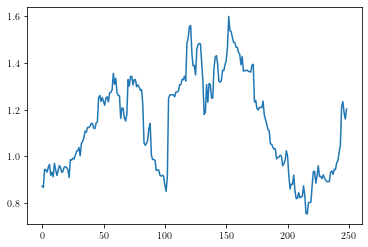

In [36]:
def compute_LP_norm(pers_landscape = [], p = 2, res = 20):
    area = 0
    for i in range(len(pers_landscape)):
        #print(pers_landscape[i])
        try:
            x = int(pers_landscape[i][1][0]) + int(pers_landscape[i][1][1])
            area += pers_landscape[i][1][0]**p + pers_landscape[i][1][1]**p
        except OverflowError:
            continue
    return area**(1/p)

# takes in the clouds, outputs the overall p-norms up to given dimension d
def cloud_to_norm(cloud, p=1, d=1):
    rips_cmplx = gd.RipsComplex(points=cloud, max_edge_length=1.0)
    simplex_tree = rips_cmplx.create_simplex_tree(max_dimension = 3)
    pers = simplex_tree.persistence()
    # plot 
    #plt = gd.plot_persistence_diagram( pers )
    print(compute_LP_norm(pers))
    return compute_LP_norm(pers)

howl = []
raven = []
captain = []
print(len(clouds[1]))
clouds[0] = clouds[0][1:300]
k=50
for i in range(len(clouds[0])-k):
    howl.append(cloud_to_norm(clouds[0][i:k+i]))
    #print(i)
    #raven.append(cloud_to_norm(clouds[1][i:k+i]))
    #captain.append(cloud_to_norm(clouds[2][i:k+i]))

plt.plot(howl)
#cloud_to_norm(clouds[2][0:50])

[array([ 0.07910156, -0.0050354 ,  0.11181641], dtype=float32), array([ 0.07910156, -0.0050354 ,  0.11181641], dtype=float32), array([0.09423828, 0.20117188, 0.09228516], dtype=float32), array([0.08007812, 0.10498047, 0.04980469], dtype=float32), array([-0.12695312,  0.02197266,  0.28710938], dtype=float32), array([0.08447266, 0.34960938, 0.02197266], dtype=float32), array([0.14453125, 0.04711914, 0.10058594], dtype=float32), array([0.00034523, 0.2265625 , 0.21972656], dtype=float32), array([0.16210938, 0.16308594, 0.03393555], dtype=float32), array([-0.11572266, -0.03149414,  0.15917969], dtype=float32), array([ 0.22363281, -0.01647949, -0.03344727], dtype=float32), array([ 0.16210938,  0.44335938, -0.14160156], dtype=float32), array([ 0.234375  , -0.29492188,  0.02807617], dtype=float32), array([ 0.09667969, -0.03442383,  0.22949219], dtype=float32), array([0.30859375, 0.17578125, 0.11083984], dtype=float32), array([0.16699219, 0.15917969, 0.05078125], dtype=float32), array([ 0.01599

/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: can only concatenate tuple (not "int") to tuple

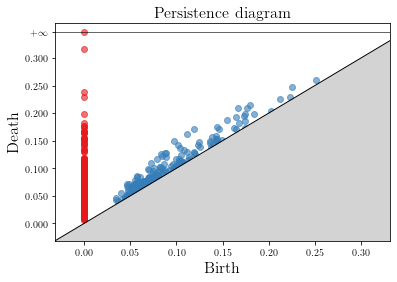

In [26]:
point_cloud = np.array(clouds[1]).tolist()
def compute_LP_norm(pers_landscape = [], p = 1, res = 20):
    area = 0
    for x in range(len(pers_landscape)-res):
        area += (np.trapz(pers_landscape[0][x:x+res]))**p
    return area**(1/p)

# takes in the clouds, outputs the overall p-norms up to given dimension d
def cloud_to_norm(cloud, p=1, d=1):
    rips_cmplx = gd.RipsComplex(points=point_cloud, max_edge_length=1.0)
    simplex_tree = rips_cmplx.create_simplex_tree(max_dimension = 3)
    pers = simplex_tree.persistence()
    # plot 
    plt = gd.plot_persistence_diagram( pers )
    print(compute_LP_norm(pers))
    return compute_LP_norm(pers)

def norm_over_time(text_cloud,res=20):
    norm_series = []
    for i in range(len(text_cloud)-res):
        print('ah')
        norm_series.append( cloud_to_norm(text_cloud[i:i+res]) )
        print('oi')
    return norm_series

print(clouds[0][0:53])
print(norm_over_time(clouds[0][0:53]))

In [ ]:
def draw_persistence_diagram(name, point_cloud, maximal_radius=1, max_dim=1, plot=True):
    """
    Returns and optionally plots the persistence diagram of the given point cloud using the Rips Complex.

    ARGUMENTS
    =========
    `point_cloud` (list): the point cloud to undergo persistence analysis
    `maximal_radius` (float): the maximum radius, epsilon, to be used for constructing the Rips Complex
    `max_dim` (int): the maximum dimension of persistence to be computed
    `plot` (bool): if `True`, the persistence diagram is plotted

    RETURN
    ======
    Returns the persistence diagram as a dictionary such that
        a) keys are the dimensions being considered
        b) for a given key `D`, the value would be the list of all points
           in the `D`-dimensional persistence diagram.
    """
    rips_cmplx = gd.RipsComplex(points=point_cloud, max_edge_length=maximal_radius)
    simplex_tree = rips_cmplx.create_simplex_tree(max_dimension = max_dim)
    pers = simplex_tree.persistence()
    dim_wise_pers_diag = {}
    for point in pers:
        if point[0] not in dim_wise_pers_diag:
            dim_wise_pers_diag[point[0]] = []
        if not math.isinf(point[1][1]):
            dim_wise_pers_diag[point[0]].append(point[1])
    if plot:
        ax = gd.plot_persistence_diagram(pers, legend = True)
        ax.set_aspect("equal")
        plt.savefig(name + ".jpg")
    return dim_wise_pers_diag

def main():
    clouds, labels = texts_to_point_clouds()
    plot_clouds_by_norms(clouds)

main()